Saving TotalPorComarcaPoblacionAños.json to TotalPorComarcaPoblacionAños.json


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local

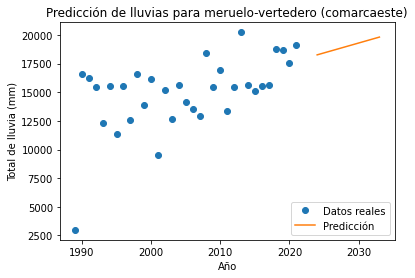

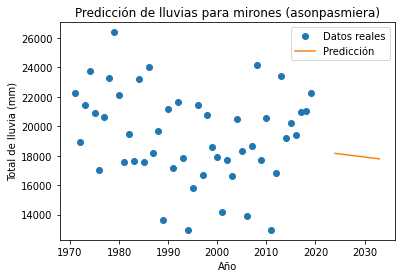

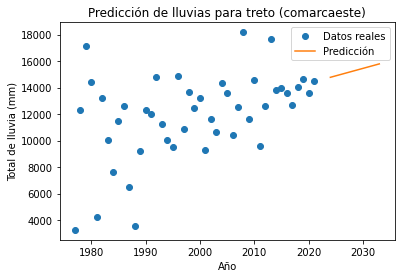

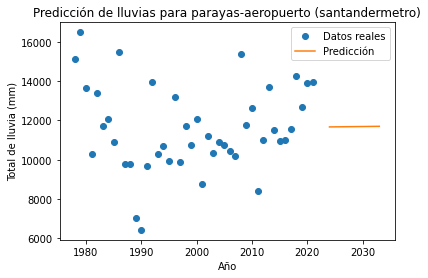

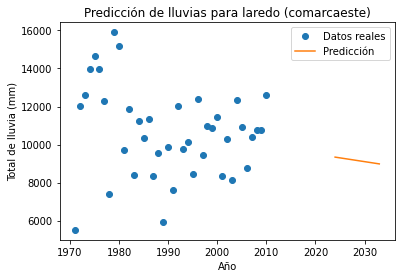

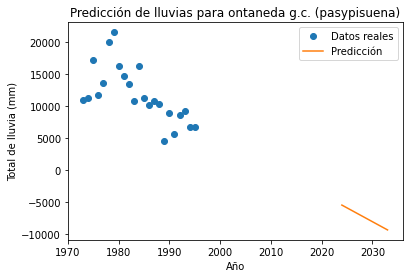

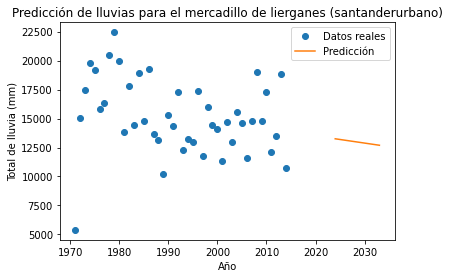

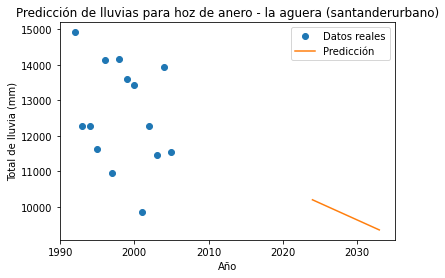

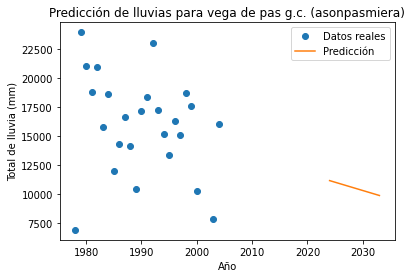

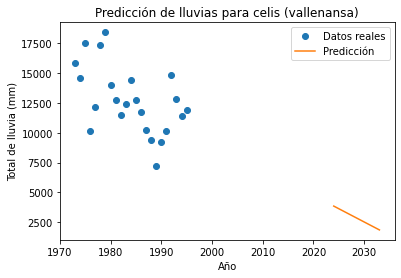

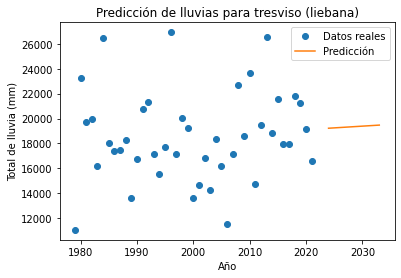

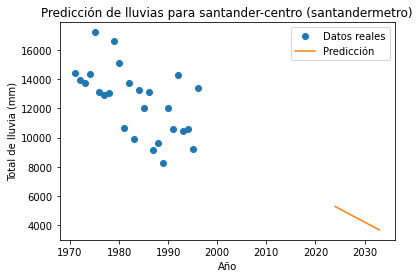

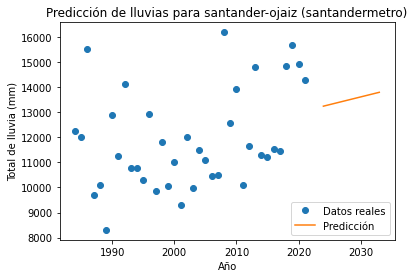

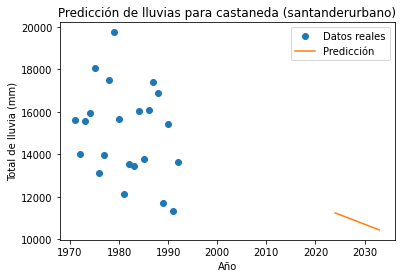

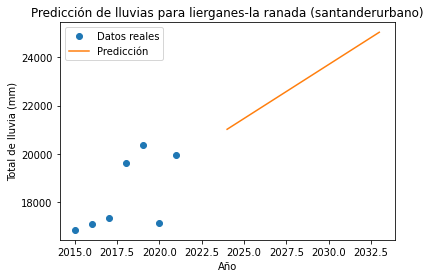

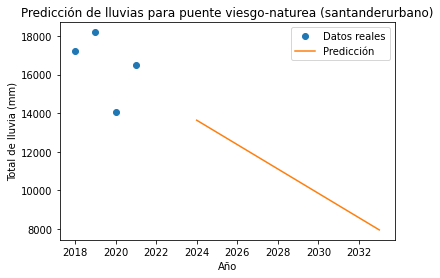

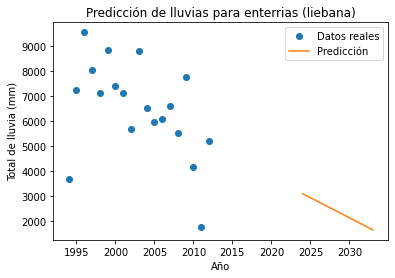

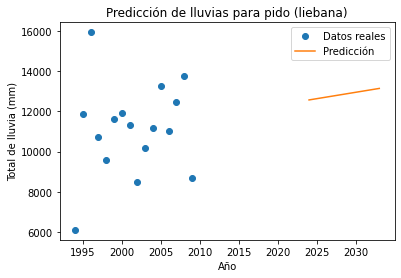

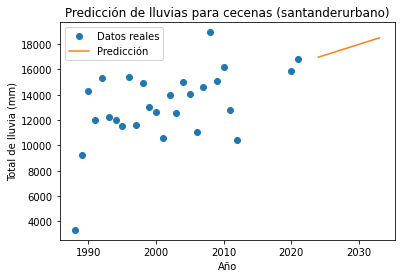

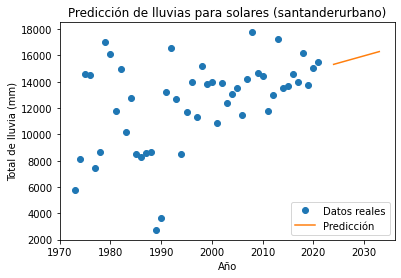

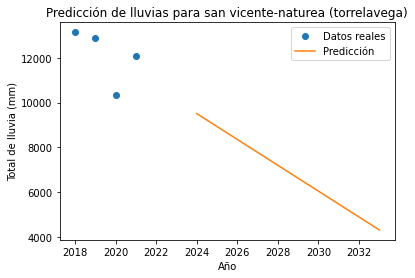

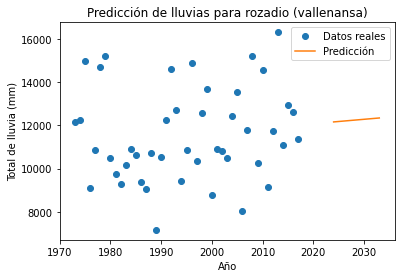

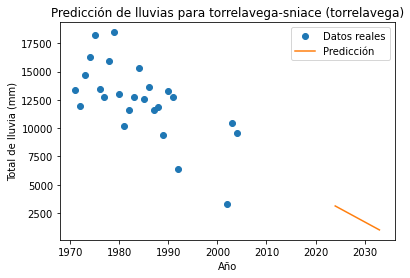

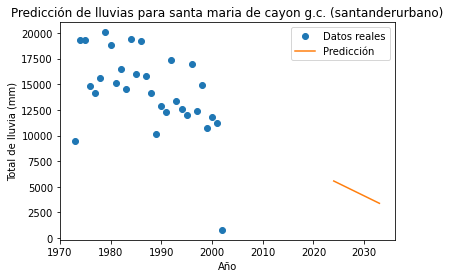

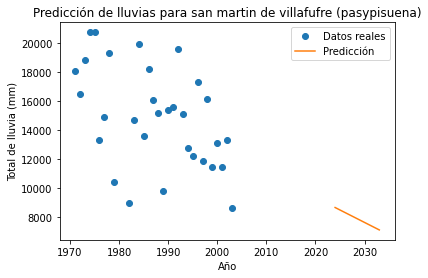

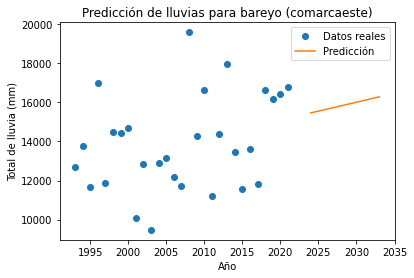

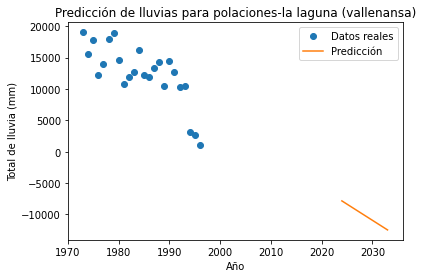

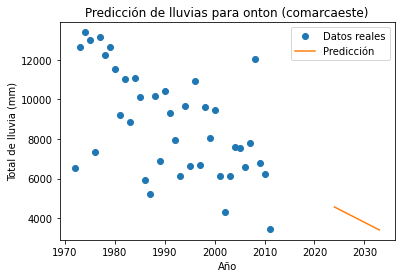

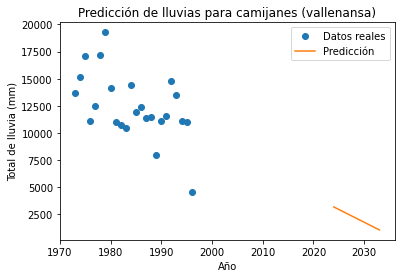

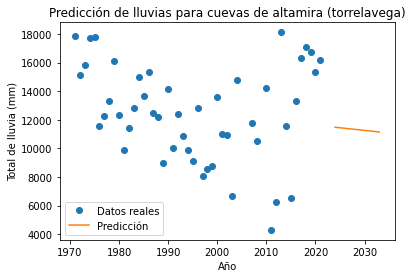

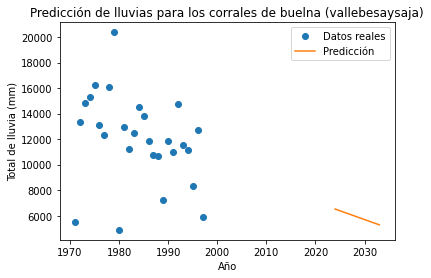

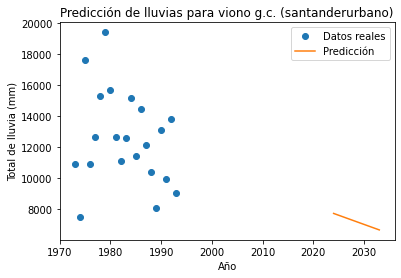

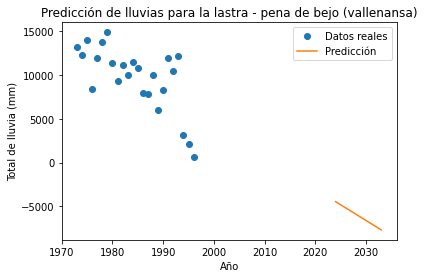

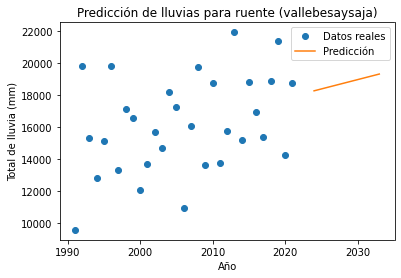

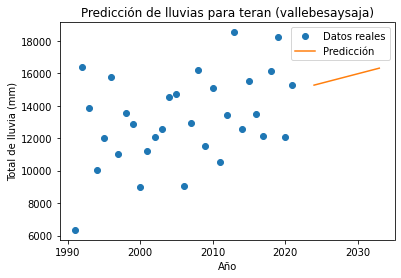

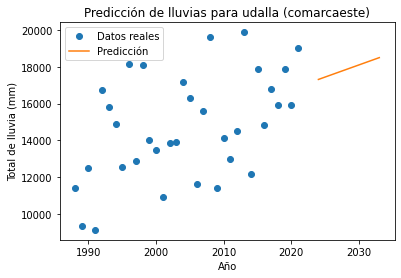

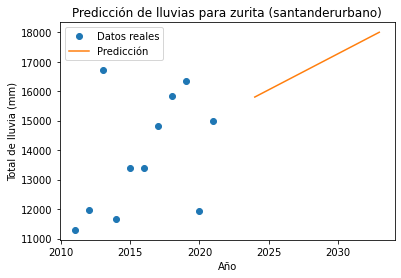

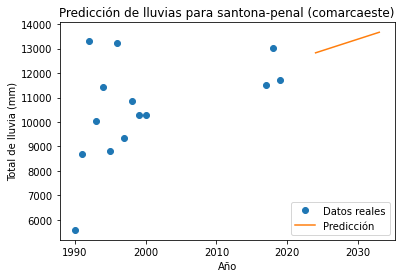

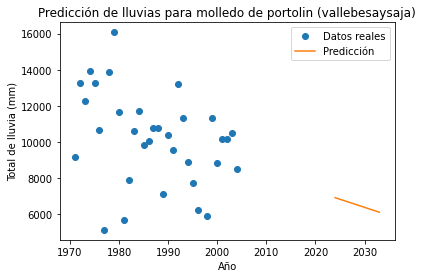

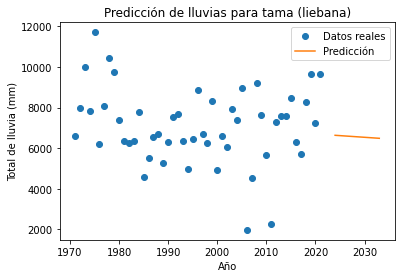

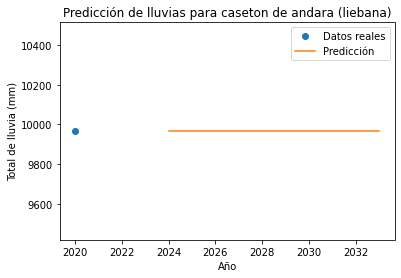

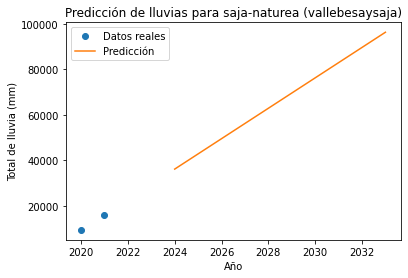

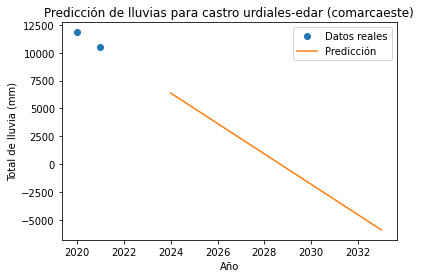

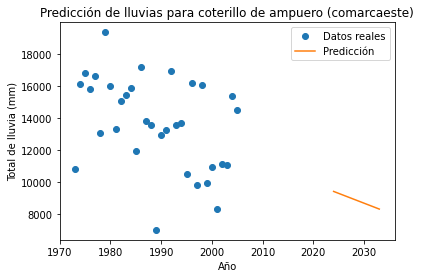

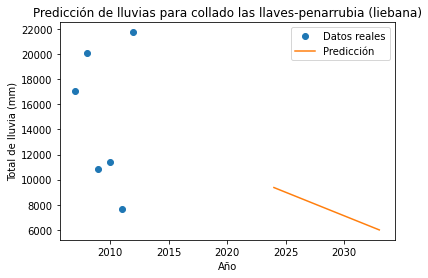

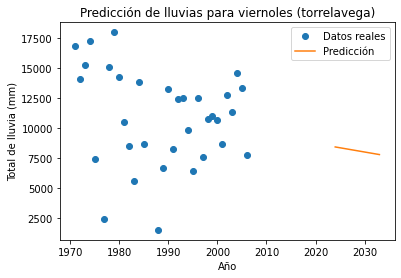

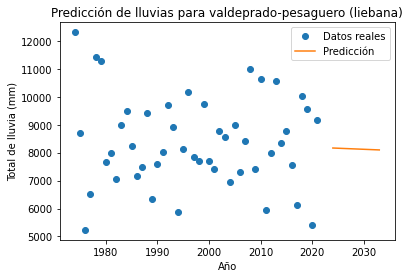

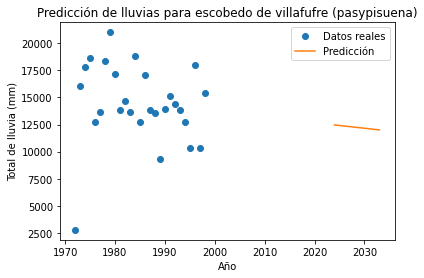

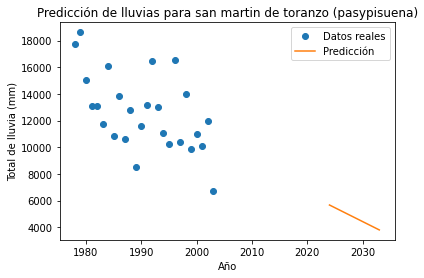

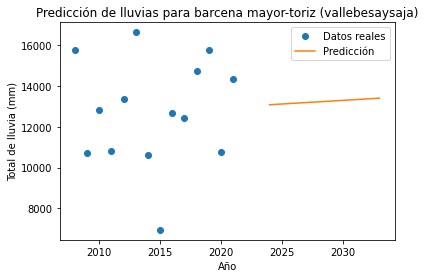

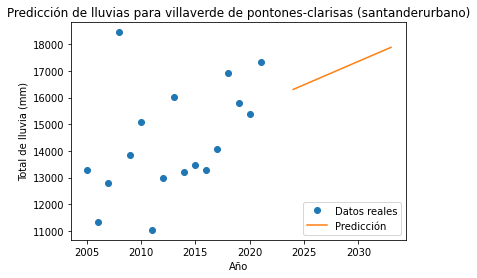

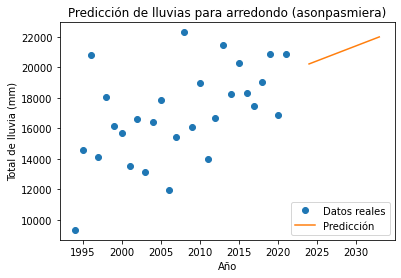

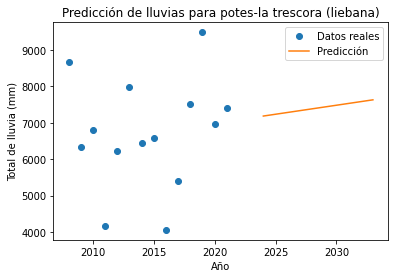

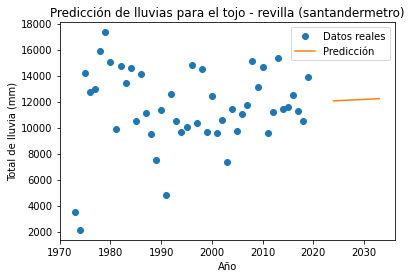

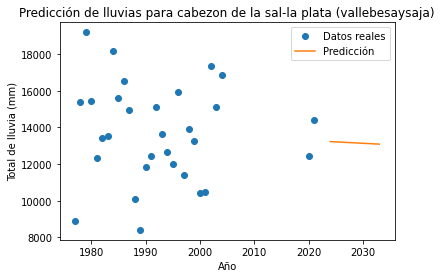

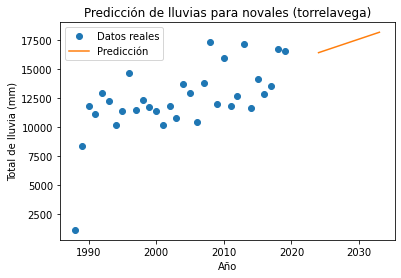

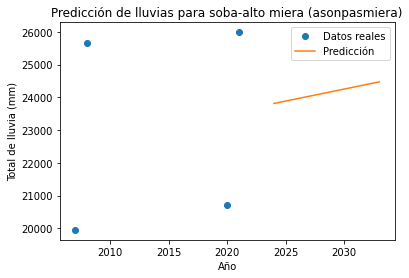

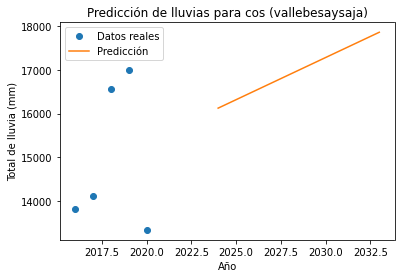

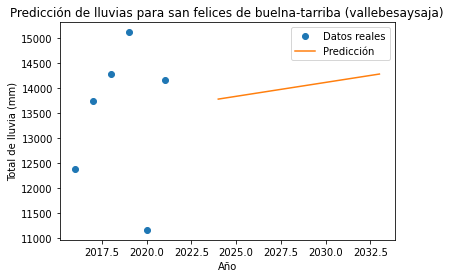

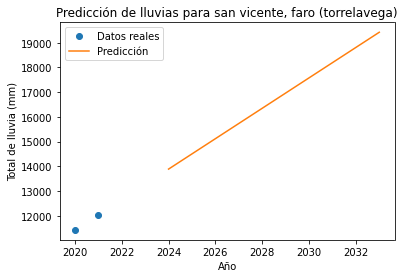

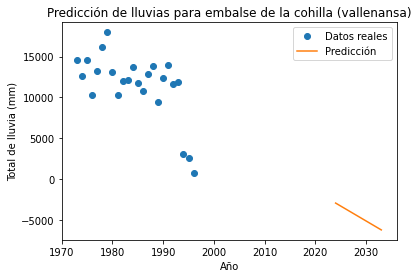

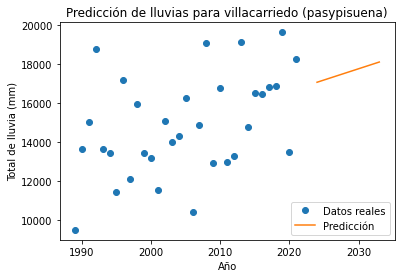

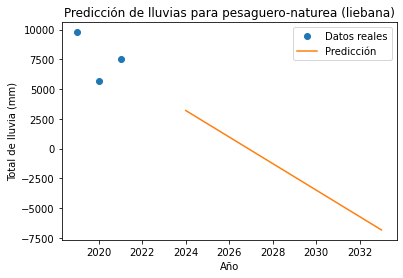

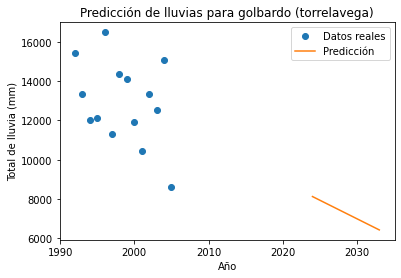

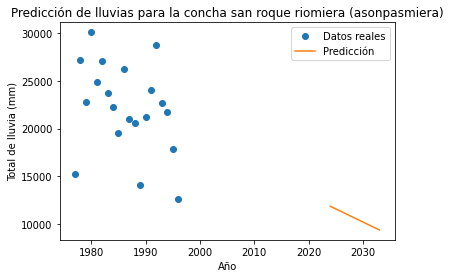

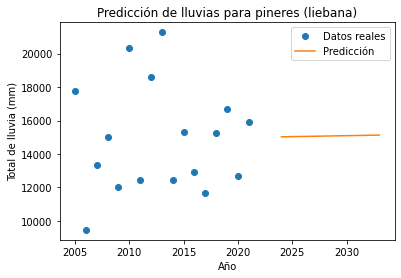

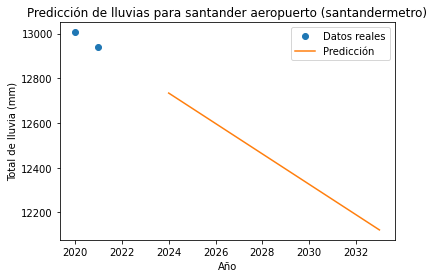

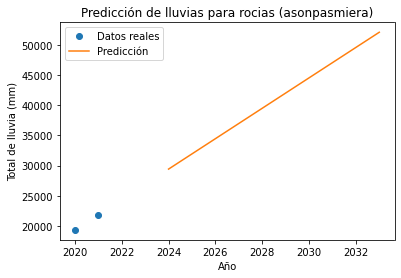

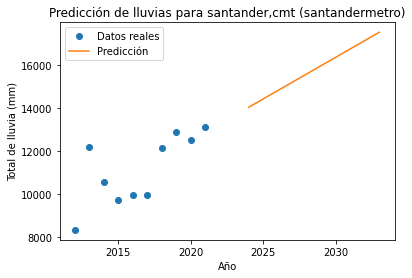

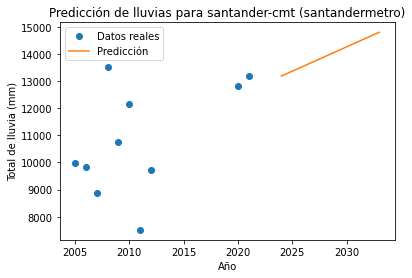

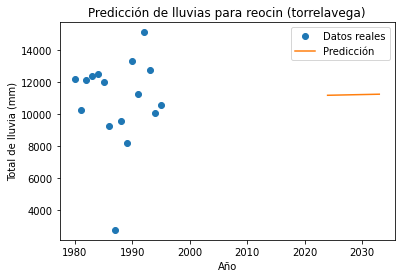

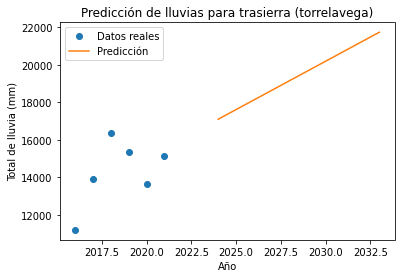

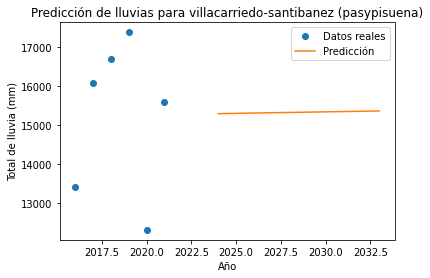

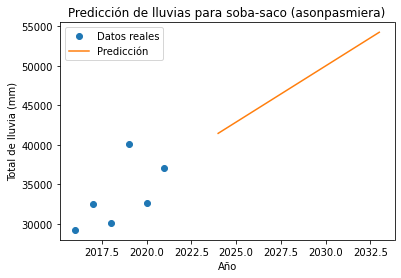

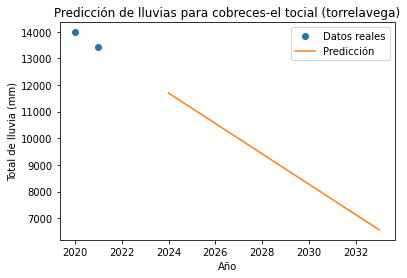

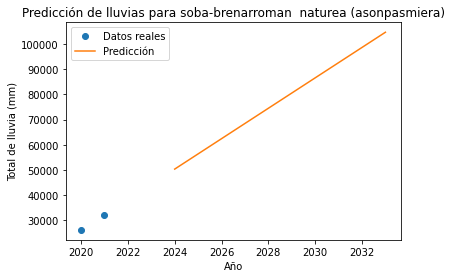

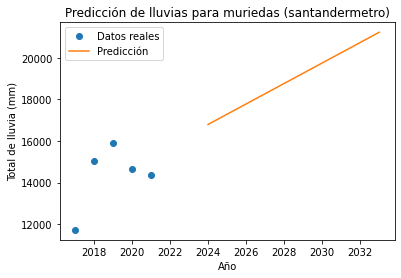

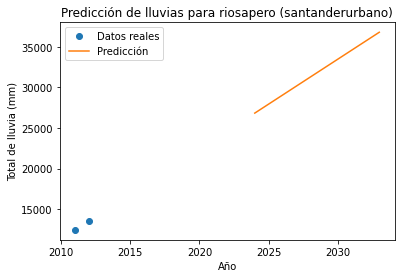

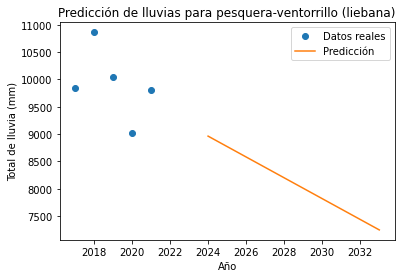

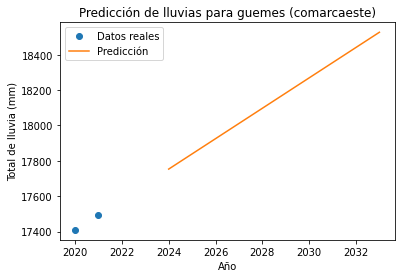

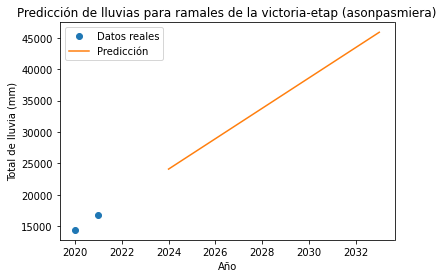

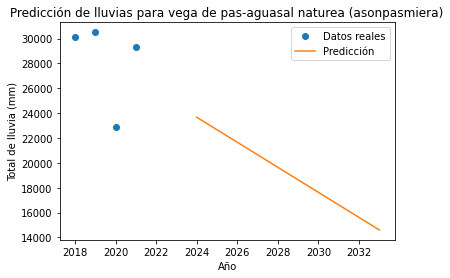

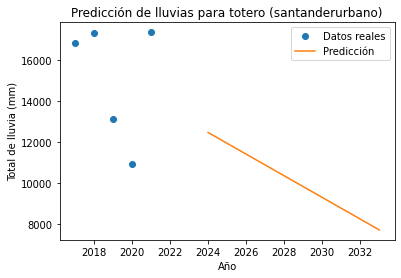

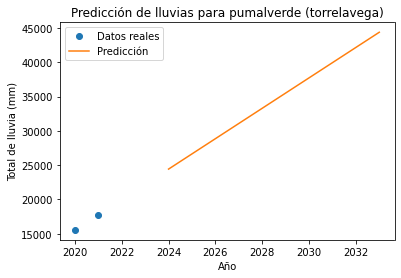

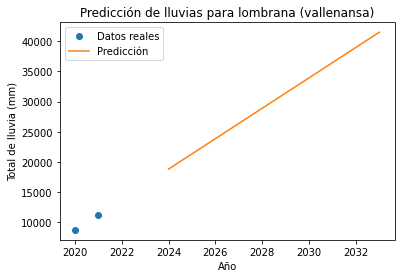

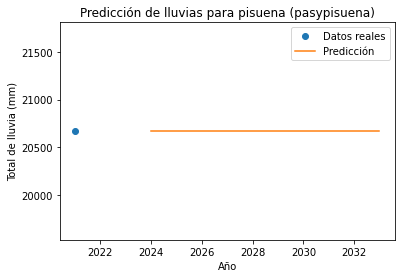

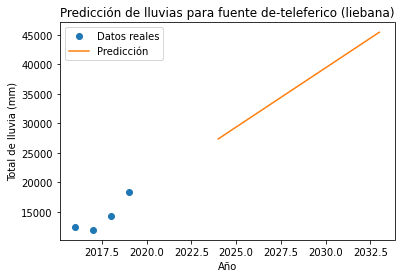

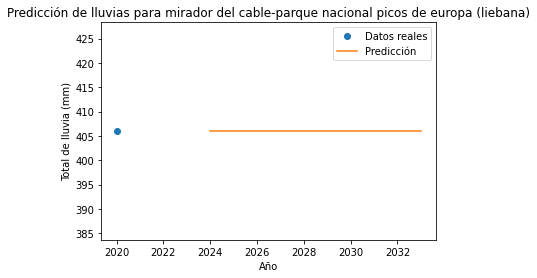

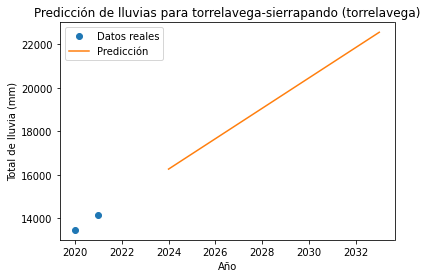

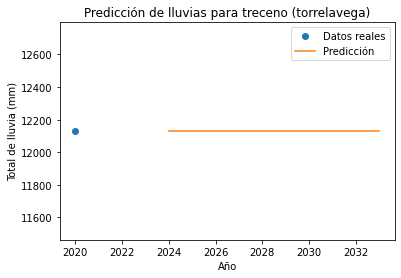

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from google.colab import files

# Solicitar al usuario que cargue el archivo deseado desde su ordenador
uploaded = files.upload()

# Cargar el archivo JSON en un DataFrame de Pandas
df = pd.read_json(next(iter(uploaded)), orient='records')

# Crear un diccionario de DataFrames para agrupar los datos por comarca y población
rain_data = {}
for i in range(len(df)):
    key = (df.iloc[i]['comarca'], df.iloc[i]['poblacion'])
    if key not in rain_data:
        rain_data[key] = pd.DataFrame(columns=['total', 'año'])
    rain_data[key] = rain_data[key].append(df.iloc[i])

# Crear un diccionario para guardar las predicciones y las gráficas por comarca y población
results = {}
for key, df in rain_data.items():
    comarca, poblacion = key
    
    # Entrenar un modelo de regresión lineal
    X = df['año'].values.reshape(-1, 1)
    y = df['total']
    model = LinearRegression().fit(X, y)
    
    # Generar predicciones para los próximos 10 años
    future_years = pd.DataFrame({'año': range(2024, 2034)})
    predictions_df = pd.DataFrame({'total': model.predict(future_years)})
    
    # Guardar las predicciones en un archivo CSV
    predictions_df.to_csv(f'{comarca}_{poblacion}_predictions.csv', index=False)
    
    # Generar y guardar la gráfica de la predicción en formato PNG
    fig, ax = plt.subplots()
    ax.plot(df['año'], df['total'], 'o', label='Datos reales')
    ax.plot(future_years['año'], predictions_df['total'], label='Predicción')
    ax.legend()
    ax.set_xlabel('Año')
    ax.set_ylabel('Total de lluvia (mm)')
    ax.set_title(f'Predicción de lluvias para {poblacion} ({comarca})')
    fig.savefig(f'{comarca}_{poblacion}_prediction.png')
    
    # Agregar las predicciones y la gráfica al diccionario de resultados
    results[key] = {'predictions': predictions_df, 'figure': fig}

# Mostrar la gráfica de una de las predicciones como ejemplo
comarca_ejemplo, poblacion_ejemplo = list(results.keys())[0]
results[(comarca_ejemplo, poblacion_ejemplo)]['figure'].show()


Saving TotalPorComarcaPoblacionAños.json to TotalPorComarcaPoblacionAños.json


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local

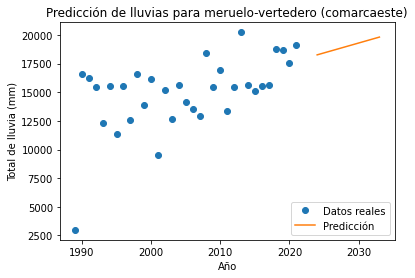

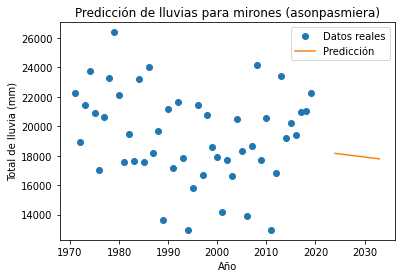

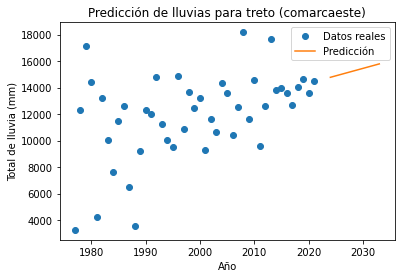

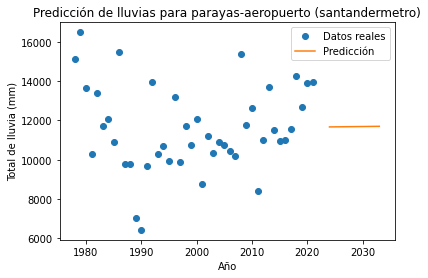

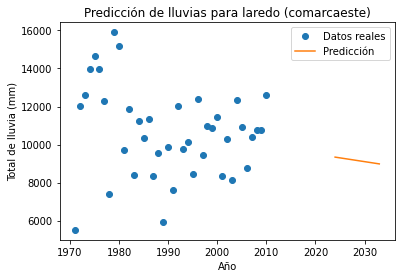

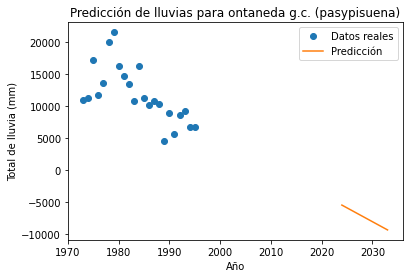

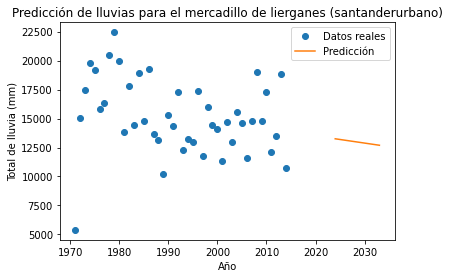

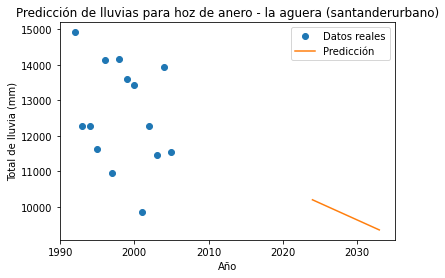

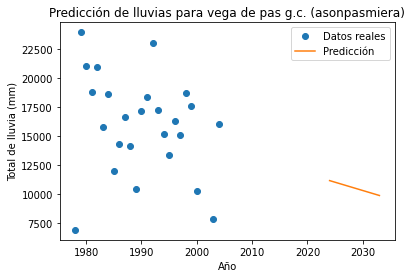

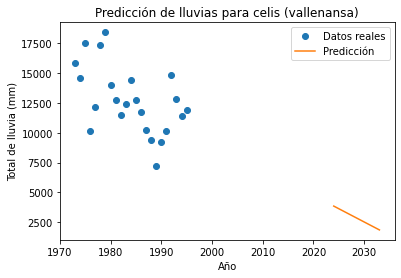

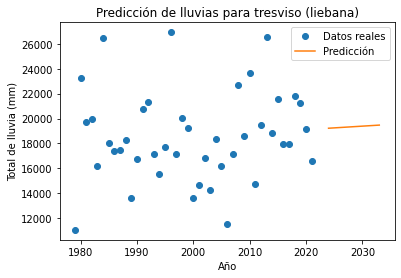

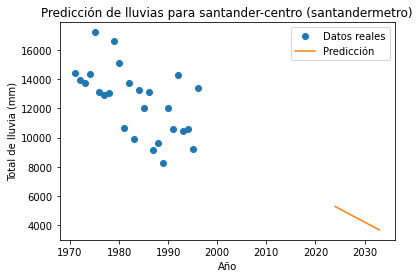

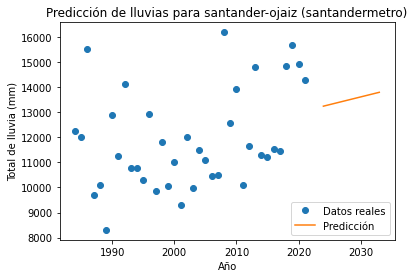

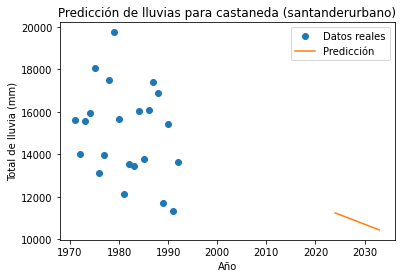

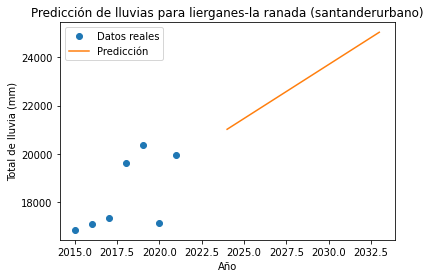

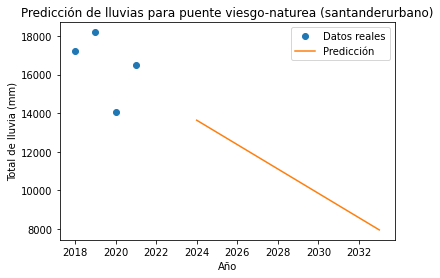

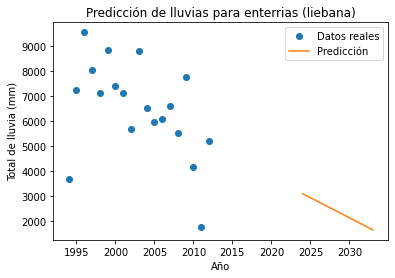

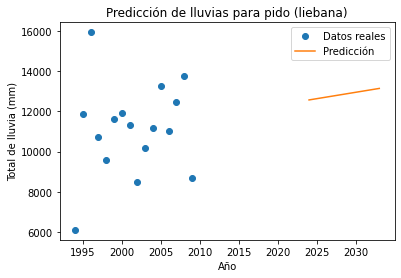

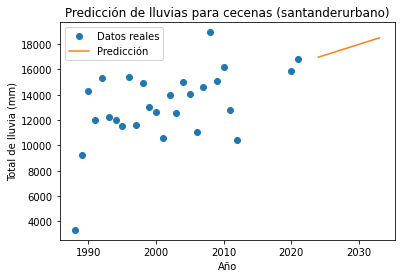

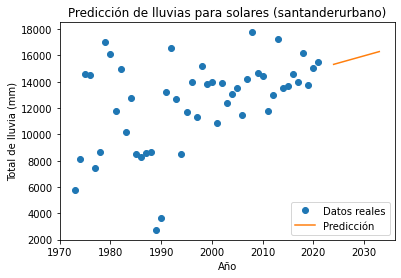

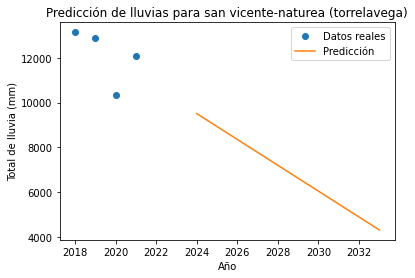

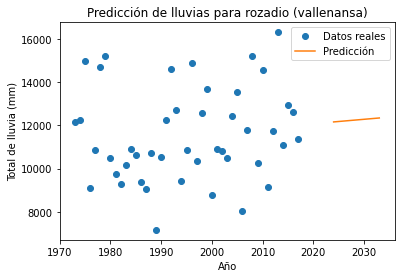

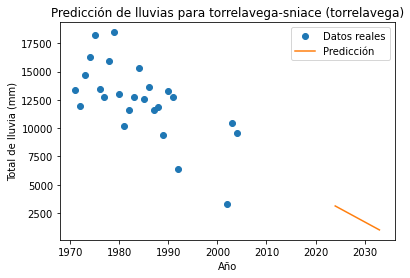

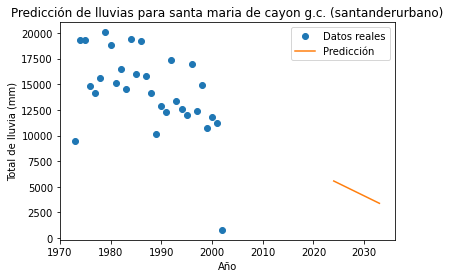

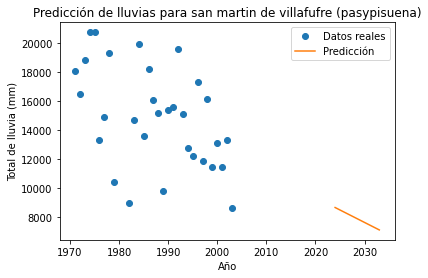

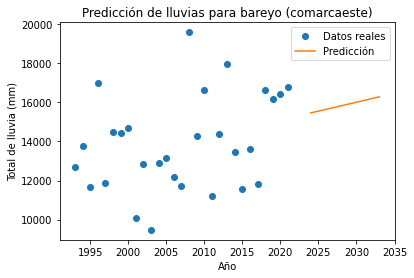

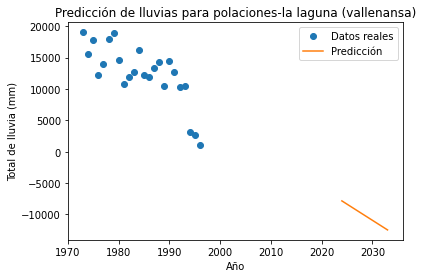

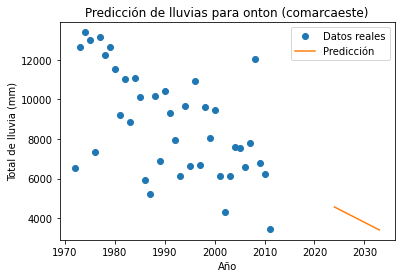

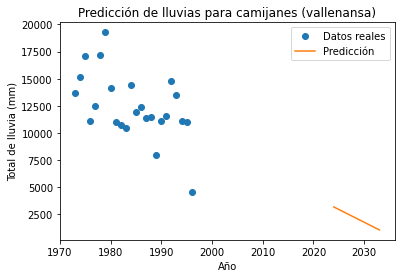

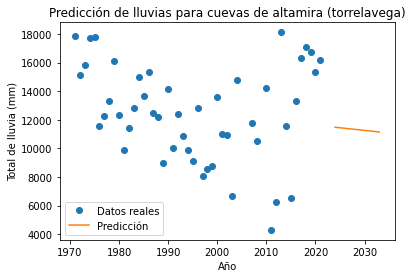

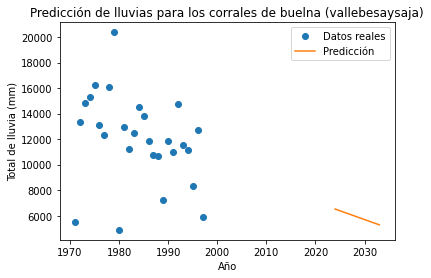

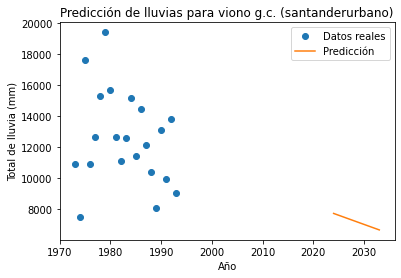

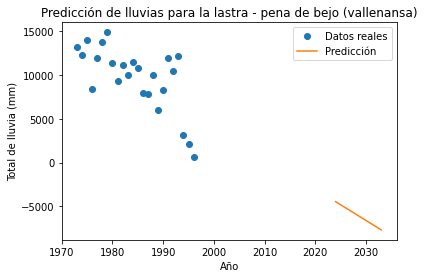

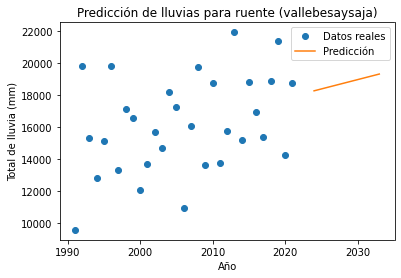

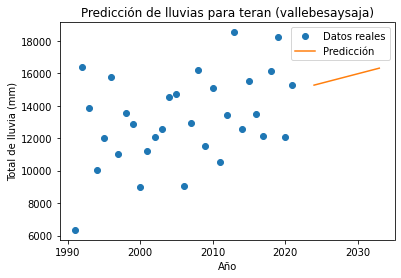

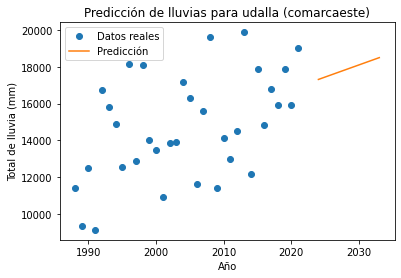

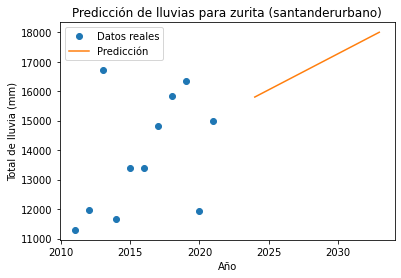

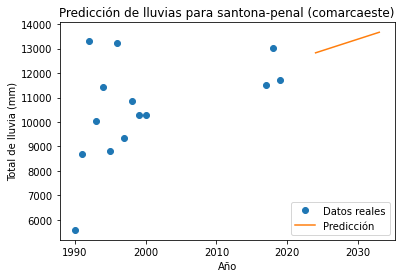

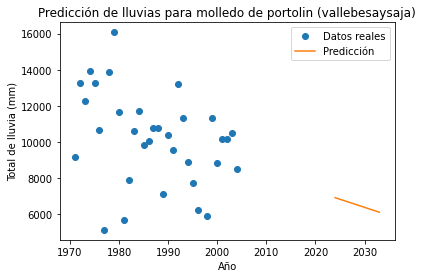

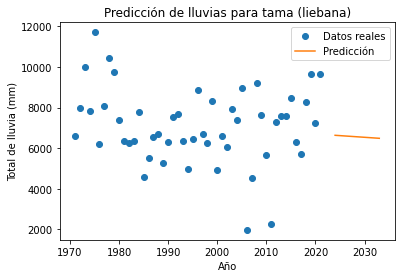

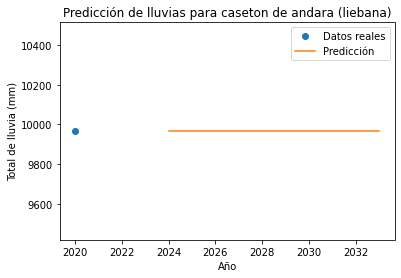

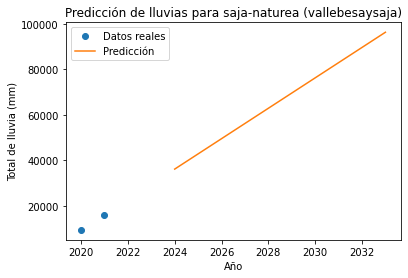

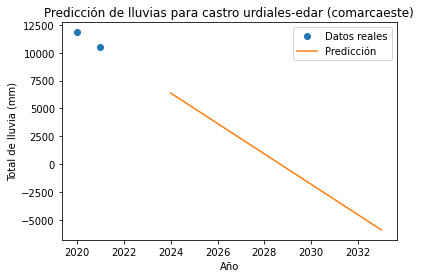

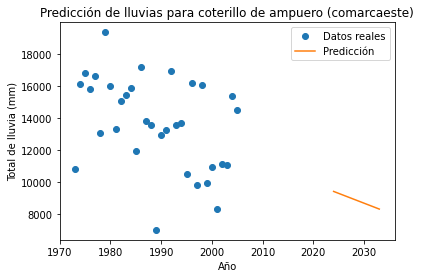

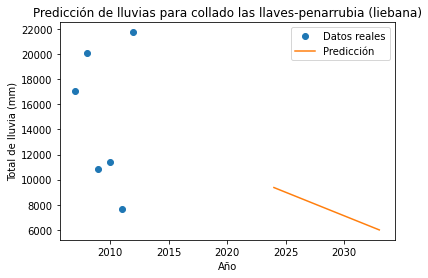

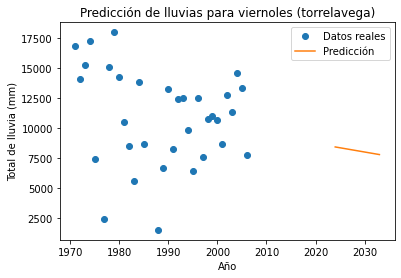

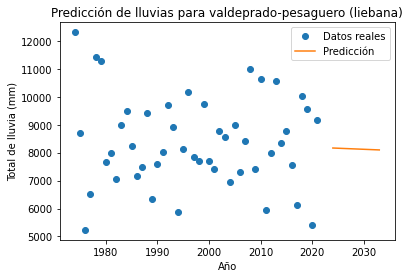

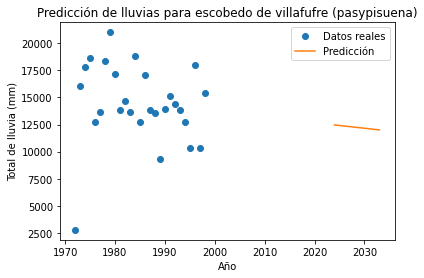

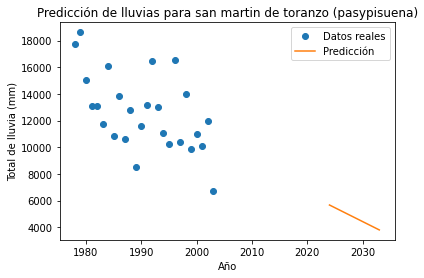

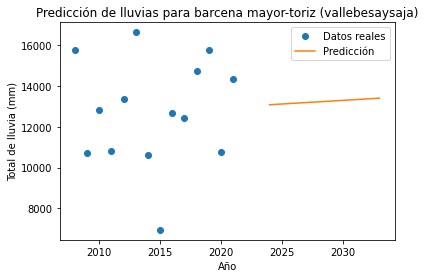

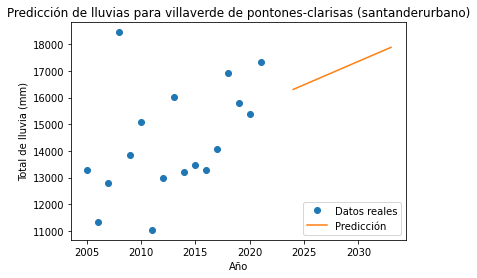

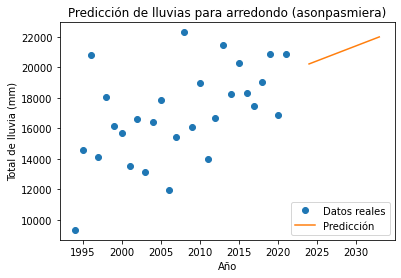

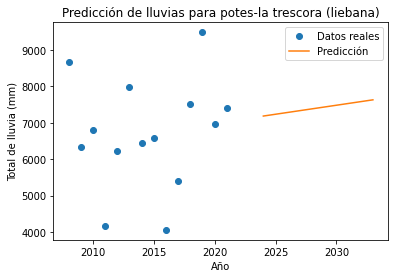

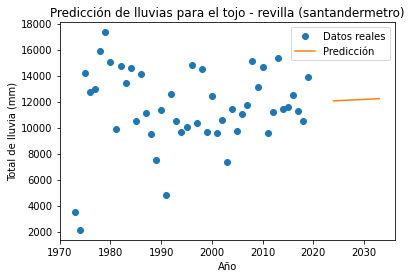

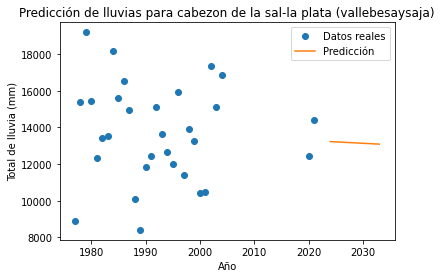

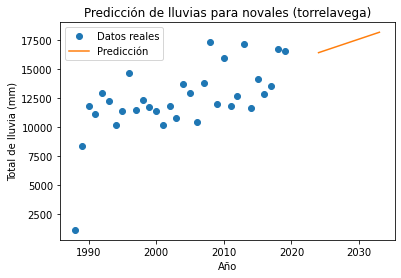

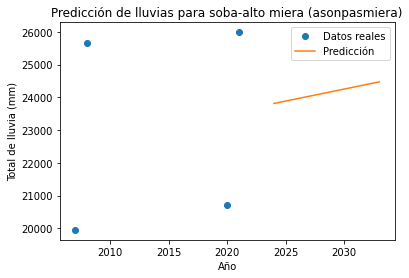

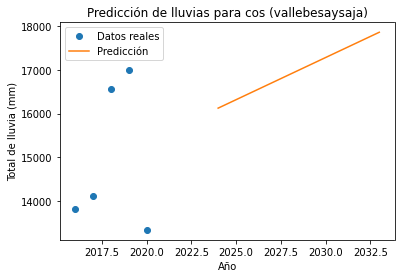

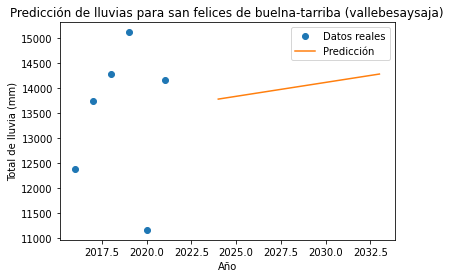

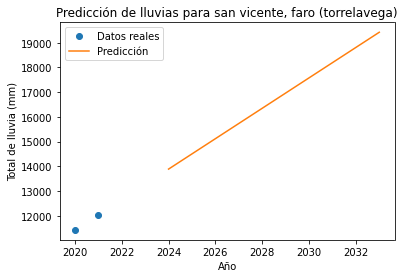

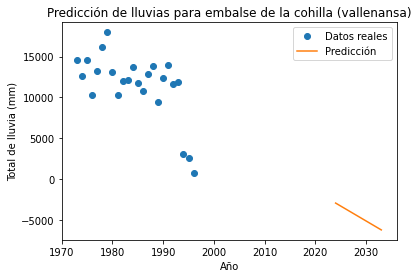

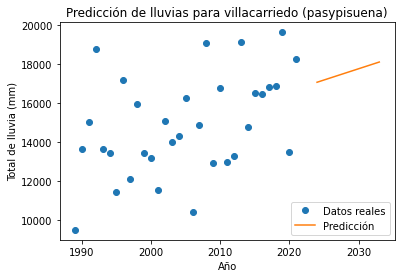

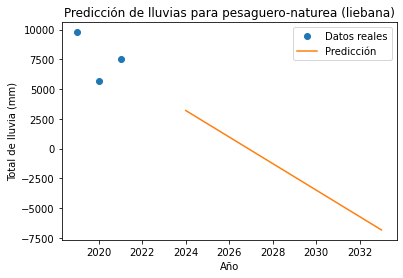

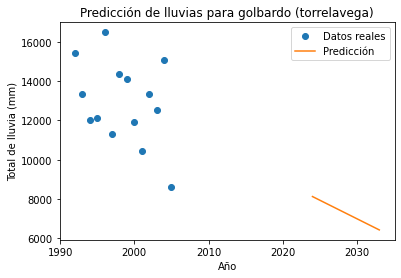

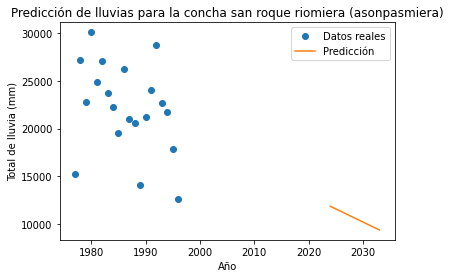

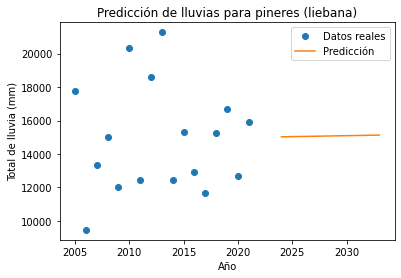

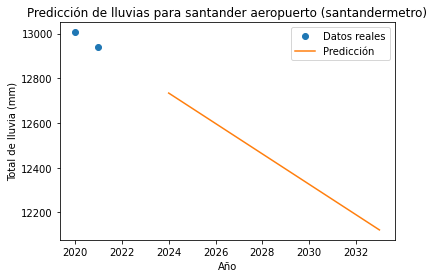

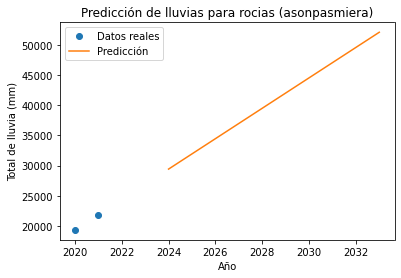

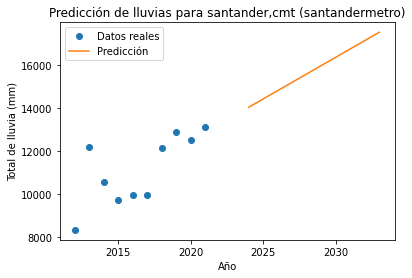

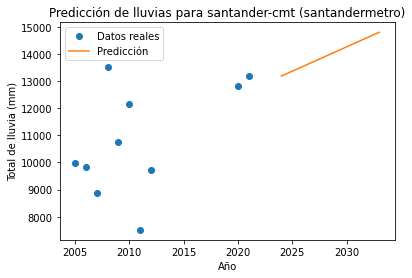

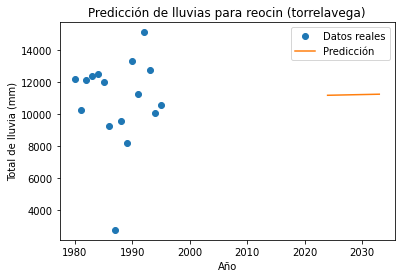

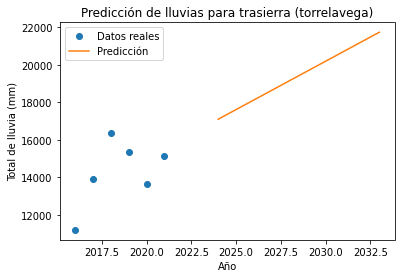

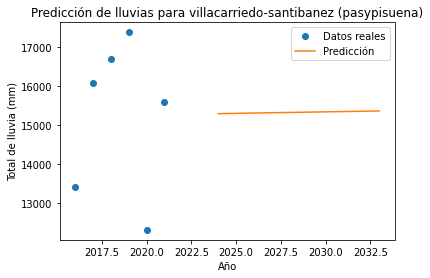

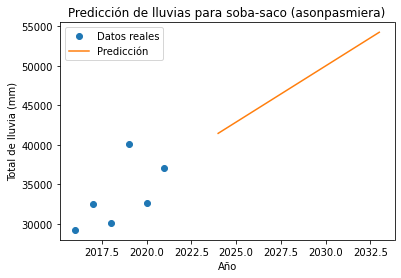

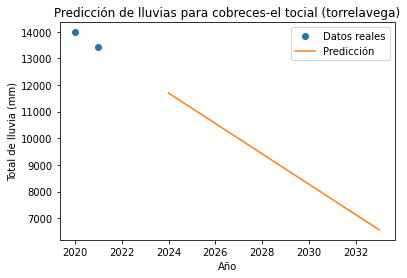

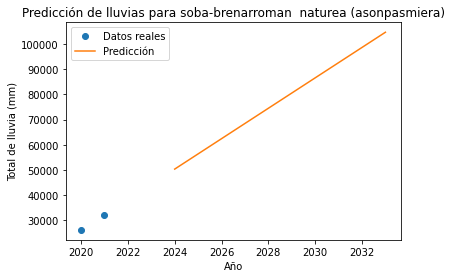

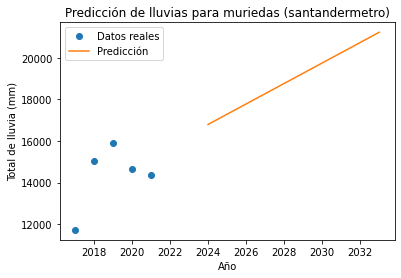

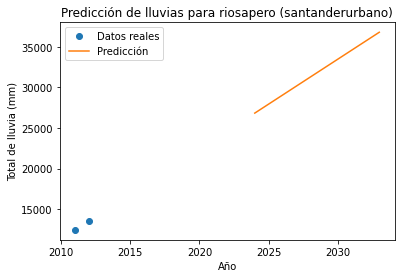

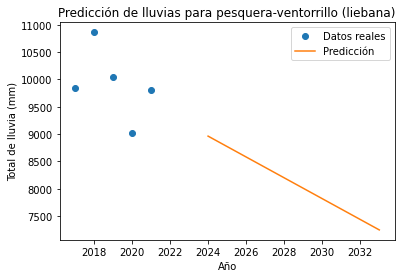

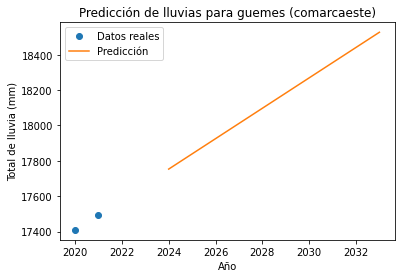

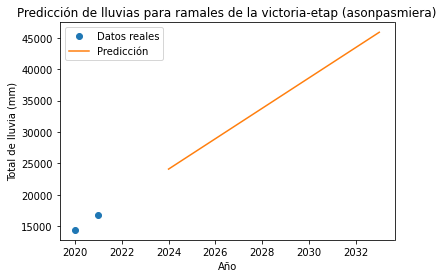

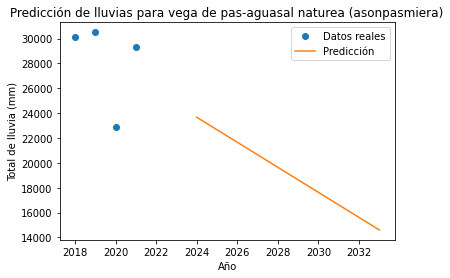

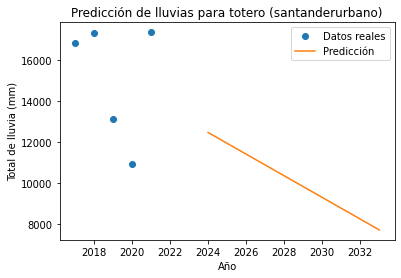

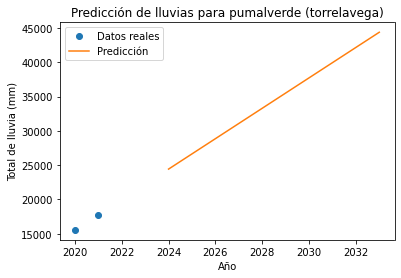

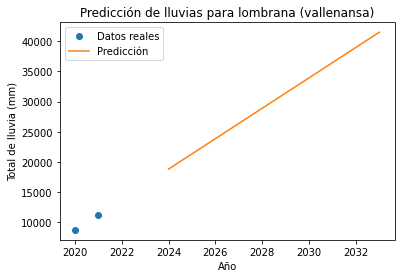

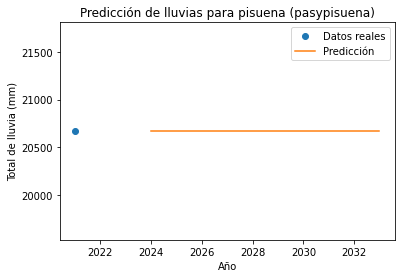

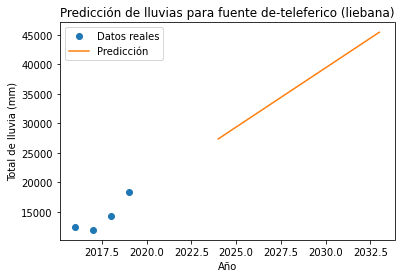

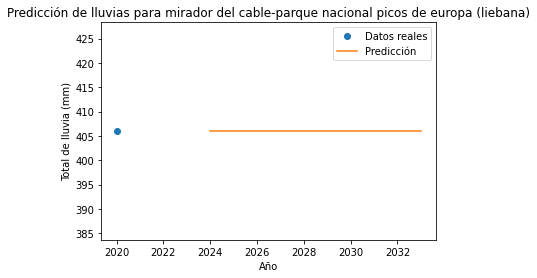

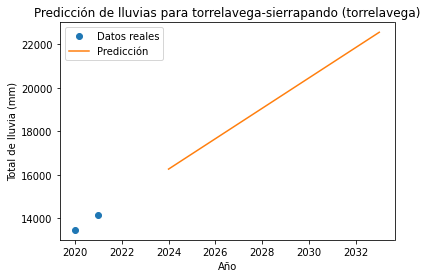

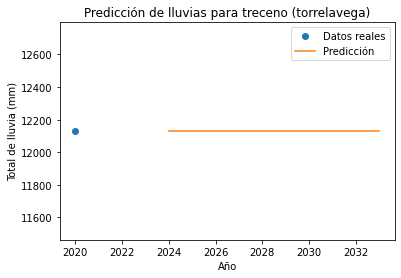

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from google.colab import files

# Crear la carpeta de resultados si no existe
if not os.path.exists('resultados'):
    os.makedirs('resultados')

# Solicitar al usuario que cargue el archivo deseado desde su ordenador
uploaded = files.upload()

# Cargar el archivo JSON en un DataFrame de Pandas
df = pd.read_json(next(iter(uploaded)), orient='records')

# Crear un diccionario de DataFrames para agrupar los datos por comarca y población
rain_data = {}
for i in range(len(df)):
    key = (df.iloc[i]['comarca'], df.iloc[i]['poblacion'])
    if key not in rain_data:
        rain_data[key] = pd.DataFrame(columns=['total', 'año'])
    rain_data[key] = rain_data[key].append(df.iloc[i])

# Crear un diccionario para guardar las predicciones y las gráficas por comarca y población
results = {}
for key, df in rain_data.items():
    comarca, poblacion = key
    
    # Entrenar un modelo de regresión lineal
    X = df['año'].values.reshape(-1, 1)
    y = df['total']
    model = LinearRegression().fit(X, y)
    
    # Generar predicciones para los próximos 10 años
    future_years = pd.DataFrame({'año': range(2024, 2034)})
    predictions_df = pd.DataFrame({'total': model.predict(future_years)})
    
    # Guardar las predicciones en un archivo CSV
    predictions_df.to_csv(f'resultados/{comarca}_{poblacion}_predictions.csv', index=False)
    
    # Generar y guardar la gráfica de la predicción en formato PNG
    fig, ax = plt.subplots()
    ax.plot(df['año'], df['total'], 'o', label='Datos reales')
    ax.plot(future_years['año'], predictions_df['total'], label='Predicción')
    ax.legend()
    ax.set_xlabel('Año')
    ax.set_ylabel('Total de lluvia (mm)')
    ax.set_title(f'Predicción de lluvias para {poblacion} ({comarca})')
    fig.savefig(f'resultados/{comarca}_{poblacion}_prediction.png')
    
    # Agregar las predicciones y la gráfica al diccionario de resultados
    results[key] = {'predictions': predictions_df, 'figure': fig}

# Concatenar todos los archivos CSV en uno solo
all_predictions_df = pd.concat([result['predictions'].assign(comarca=comarca, poblacion=poblacion)
                                for (comarca, poblacion), result in results.items()])
all_predictions_df.to_csv('resultados/all_predictions.csv', index=False)

# Mostrar la gráfica de una de las predicciones como ejemplo
comarca_ejemplo, poblacion_ejemplo = list(results.keys())[0]
results[(comarca_ejemplo, poblacion_ejemplo)]['figure'].show()


# Nueva sección